In [ ]:
#Dehtiarenko Yarosla

In [ ]:
from sklearn.datasets import load_wine

In [ ]:
wine_data = load_wine()

In [ ]:
X = wine_data.data
y = wine_data.target

In [ ]:
import numpy as np

In [ ]:
index = 9927
X = np.delete(X, index % 10, axis = 1) # axis=1 oznaczają, że usuwamy kolumnę (7), a nie wiersz.

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=58)

In [ ]:
from sklearn.preprocessing import MaxAbsScaler

In [ ]:
scaler = MaxAbsScaler()

In [ ]:
scaler.fit(X_train)

MaxAbsScaler()

In [ ]:
X_train_scal = scaler.transform(X_train)
X_test_scal = scaler.transform(X_test)

In [ ]:
from sklearn.svm import SVC as SVM

In [ ]:
model_SVM = SVM()

In [ ]:
model_SVM.fit(X_train_scal, y_train)

SVC()

In [ ]:
y_pred = model_SVM.predict(X_test_scal)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
acc= accuracy_score(y_test, y_pred)
print("Acc = ", acc)
cm= confusion_matrix(y_test, y_pred)
print("Cm:\n", cm)

Acc =  0.9166666666666666
Cm:
 [[11  1  0]
 [ 0 12  2]
 [ 0  0 10]]


In [ ]:
pip install tensorflow

In [ ]:
pip install keras

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [ ]:
#ilość klas wyjściowych
num = len(set(y))

In [ ]:
model = Sequential()
model.add(Dense(20, input_shape = (X_train_scal.shape[1],), activation = 'relu')) # przy przeuceniu dodaj regular
model.add(Dense(10, activation = 'relu'))
model.add(Dense(num, activation = 'softmax'))

In [ ]:
learning_rate = 0.001
model.compile(optimizer=Adam(learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 20)                260       
                                                                 
 dense_4 (Dense)             (None, 10)                210       
                                                                 
 dense_5 (Dense)             (None, 3)                 33        
                                                                 
Total params: 503 (1.96 KB)
Trainable params: 503 (1.96 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(X_train_scal, y_train, batch_size=50, epochs=400, validation_data=(X_test_scal, y_test))


Epoch 1/400
3/3 [==============================] - 0s 83ms/step - loss: 1.0780 - accuracy: 0.4014 - val_loss: 1.0851 - val_accuracy: 0.3889
Epoch 2/400
3/3 [==============================] - 0s 97ms/step - loss: 1.0764 - accuracy: 0.4014 - val_loss: 1.0843 - val_accuracy: 0.3889
Epoch 3/400
3/3 [==============================] - 0s 55ms/step - loss: 1.0751 - accuracy: 0.4014 - val_loss: 1.0830 - val_accuracy: 0.3889
Epoch 4/400
3/3 [==============================] - 0s 45ms/step - loss: 1.0735 - accuracy: 0.4014 - val_loss: 1.0815 - val_accuracy: 0.3889
Epoch 5/400
3/3 [==============================] - 0s 47ms/step - loss: 1.0720 - accuracy: 0.4014 - val_loss: 1.0803 - val_accuracy: 0.3889
Epoch 6/400
3/3 [==============================] - 0s 81ms/step - loss: 1.0706 - accuracy: 0.4014 - val_loss: 1.0789 - val_accuracy: 0.3889
Epoch 7/400
3/3 [==============================] - 0s 51ms/step - loss: 1.0688 - accuracy: 0.4014 - val_loss: 1.0773 - val_accuracy: 0.3889
Epoch 8/400
3/3 [===

In [ ]:
historia = model.history.history
floss_train = historia['loss']
floss_test = historia['val_loss']
acc_train = historia['accuracy']
acc_test = historia['val_accuracy']

In [ ]:
num_epochs = len(acc_test)
epochs = np.arange(num_epochs)

In [ ]:
from matplotlib import pyplot as plt

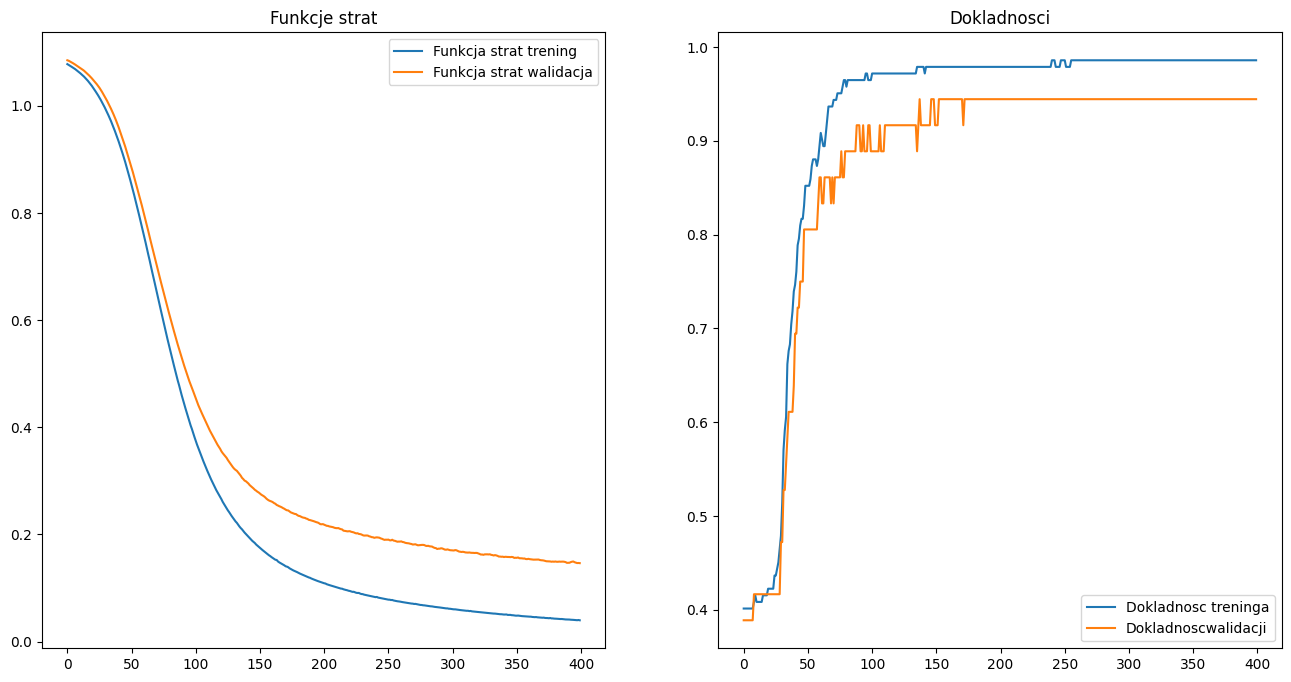

In [ ]:
fig,ax = plt.subplots(1,2, figsize=(16,8))
ax[0].plot(epochs, floss_train, label = 'Funkcja strat trening')
ax[0].plot(epochs, floss_test, label = 'Funkcja strat walidacja')
ax[0].set_title('Funkcje strat')
ax[0].legend()
ax[1].set_title('Dokladnosci')
ax[1].plot(epochs, acc_train, label = 'Dokladnosc treninga')
ax[1].plot(epochs, acc_test, label = 'Dokladnoscwalidacji')
ax[1].legend()

In [ ]:
y_pred = model.predict(X_test_scal)
acc = accuracy_score(y_test, np.argmax(y_pred, axis = 1)) #oblic maximum z kazdej kolumny
print(acc)

2/2 [==============================] - 0s 6ms/step
0.9444444444444444


In [ ]:
#### PRZEUCZENIE

from keras.layers import Dropout
from keras.regularizers import l2

In [ ]:
model_mod1 = Sequential() # pierwszy bedzie z regularyzacja

model_mod1.add(Dense(20, input_shape = (X_train_scal.shape[1],), activation = 'relu'))
model_mod1.add(Dropout(0.5)) # od przeuczenia
model_mod1.add(Dense(10, activation = 'relu'))
model_mod1.add(Dropout(0.5)) # od przeuczenia
model_mod1.add(Dense(num, activation = 'softmax'))


In [ ]:
learning_rate = 0.001
model_mod1.compile(optimizer=Adam(learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model_mod1.summary()
model_mod1.fit(X_train_scal, y_train, batch_size=50, epochs=400, validation_data=(X_test_scal, y_test))





Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 20)                260       
                                                                 
 dropout_4 (Dropout)         (None, 20)                0         
                                                                 
 dense_28 (Dense)            (None, 10)                210       
                                                                 
 dense_29 (Dense)            (None, 3)                 33        
                                                                 
Total params: 503 (1.96 KB)
Trainable params: 503 (1.96 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/400
3/3 [==============================] - 1s 98ms/step - loss: 1.5809 - accuracy: 0.3803 - val_loss: 1.3748 - val_accuracy: 0.3889
Epoch 2/400
3/3 

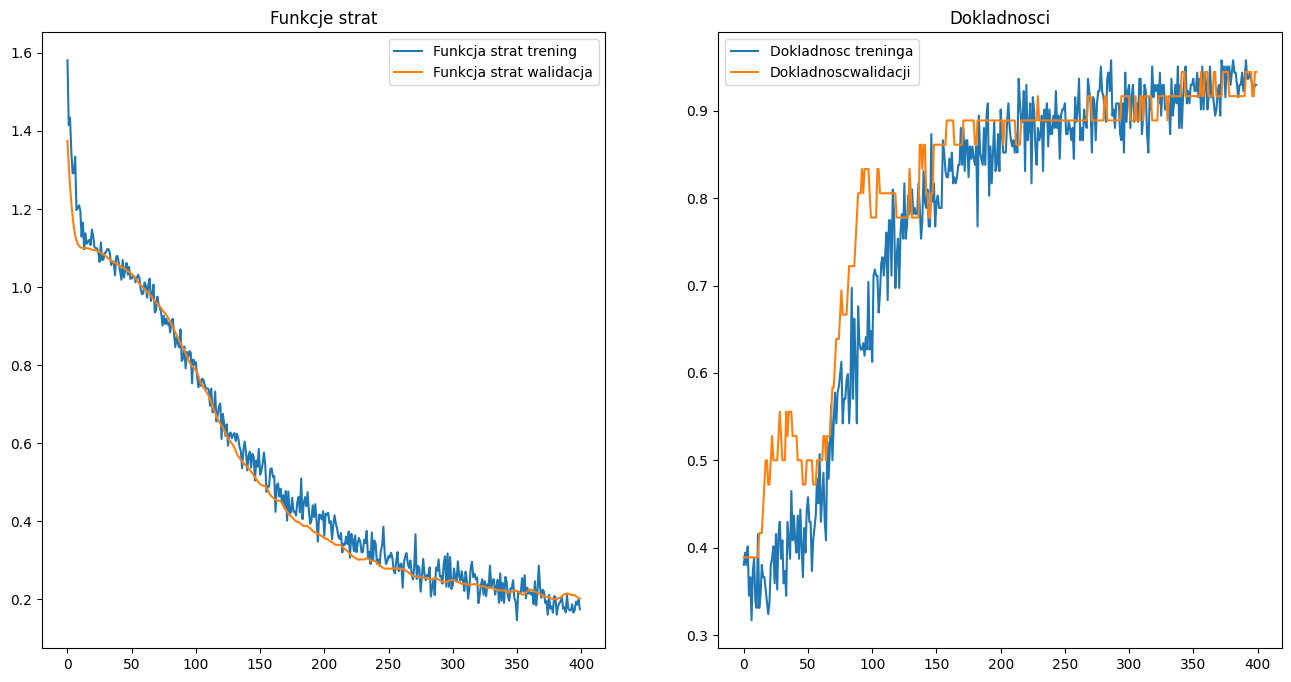

In [ ]:
historia = model_mod1.history.history
floss_train = historia['loss']
floss_test = historia['val_loss']
acc_train = historia['accuracy']
acc_test = historia['val_accuracy']
num_epochs = len(acc_test)
epochs = np.arange(num_epochs)
fig,ax = plt.subplots(1,2, figsize=(16,8))
ax[0].plot(epochs, floss_train, label = 'Funkcja strat trening')
ax[0].plot(epochs, floss_test, label = 'Funkcja strat walidacja')
ax[0].set_title('Funkcje strat')
ax[0].legend()
ax[1].set_title('Dokladnosci')
ax[1].plot(epochs, acc_train, label = 'Dokladnosc treninga')
ax[1].plot(epochs, acc_test, label = 'Dokladnoscwalidacji')
ax[1].legend()

In [ ]:
y_pred = model.predict(X_test_scal)
acc = accuracy_score(y_test, np.argmax(y_pred, axis = 1)) #oblic maximum z kazdej kolumny
print(acc)

2/2 [==============================] - 0s 4ms/step
0.9444444444444444


In [ ]:
model_mod2 = Sequential() # drugi z regularyzacja
model_mod2.add(Dense(20, input_shape = (X_train_scal.shape[1],), activation = 'relu', kernel_regularizer = l2(0.01))) #regularyzacja od przeuczenia
model_mod1.add(Dense(10, activation = 'relu'))
model_mod1.add(Dense(num, activation = 'softmax'))
model_mod2.compile(optimizer=Adam(learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model_mod2.summary()
model_mod2.fit(X_train_scal, y_train, batch_size=50, epochs=400, validation_data=(X_test_scal, y_test))

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 20)                260       
                                                                 
Total params: 260 (1.02 KB)
Trainable params: 260 (1.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/400
3/3 [==============================] - 1s 93ms/step - loss: 7.3339 - accuracy: 0.0000e+00 - val_loss: 7.3123 - val_accuracy: 0.0000e+00
Epoch 2/400
3/3 [==============================] - 0s 17ms/step - loss: 7.2225 - accuracy: 0.0000e+00 - val_loss: 7.2089 - val_accuracy: 0.0000e+00
Epoch 3/400
3/3 [==============================] - 0s 17ms/step - loss: 7.1326 - accuracy: 0.0000e+00 - val_loss: 7.1185 - val_accuracy: 0.0000e+00
Epoch 4/400
3/3 [==============================] - 0s 18ms/step - loss: 7.0497 - accuracy: 0.0000e+00 - val

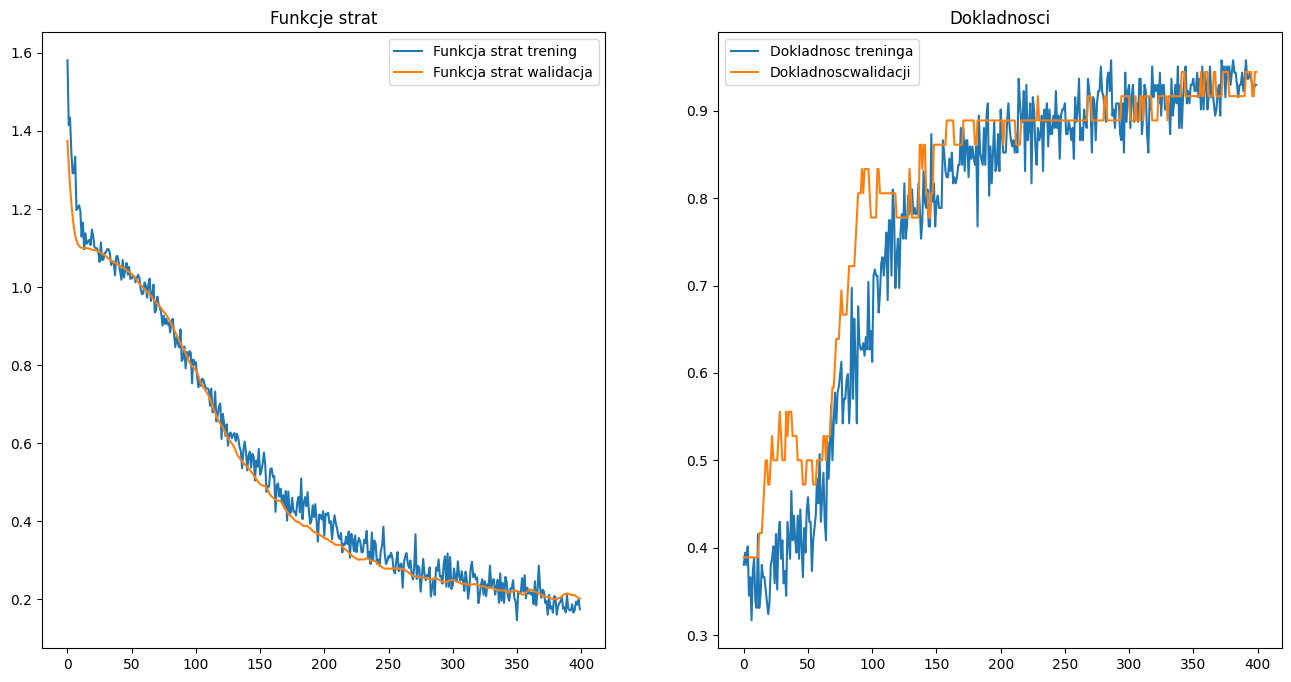

In [ ]:
historia = model_mod1.history.history
floss_train = historia['loss']
floss_test = historia['val_loss']
acc_train = historia['accuracy']
acc_test = historia['val_accuracy']
num_epochs = len(acc_test)
epochs = np.arange(num_epochs)
fig,ax = plt.subplots(1,2, figsize=(16,8))
ax[0].plot(epochs, floss_train, label = 'Funkcja strat trening')
ax[0].plot(epochs, floss_test, label = 'Funkcja strat walidacja')
ax[0].set_title('Funkcje strat')
ax[0].legend()
ax[1].set_title('Dokladnosci')
ax[1].plot(epochs, acc_train, label = 'Dokladnosc treninga')
ax[1].plot(epochs, acc_test, label = 'Dokladnoscwalidacji')
ax[1].legend()

Epoch 1/100
4/4 - 0s - loss: 0.0408 - accuracy: 1.0000 - val_loss: 0.0622 - val_accuracy: 1.0000 - 85ms/epoch - 21ms/step
Epoch 2/100
4/4 - 0s - loss: 0.0361 - accuracy: 1.0000 - val_loss: 0.0580 - val_accuracy: 1.0000 - 35ms/epoch - 9ms/step
Epoch 3/100
4/4 - 0s - loss: 0.0325 - accuracy: 0.9912 - val_loss: 0.0584 - val_accuracy: 0.9655 - 37ms/epoch - 9ms/step
Epoch 4/100
4/4 - 0s - loss: 0.0331 - accuracy: 0.9912 - val_loss: 0.0597 - val_accuracy: 0.9655 - 38ms/epoch - 10ms/step
Epoch 5/100
4/4 - 0s - loss: 0.0337 - accuracy: 0.9912 - val_loss: 0.0596 - val_accuracy: 0.9655 - 36ms/epoch - 9ms/step
Epoch 6/100
4/4 - 0s - loss: 0.0330 - accuracy: 0.9912 - val_loss: 0.0586 - val_accuracy: 0.9655 - 39ms/epoch - 10ms/step
Epoch 7/100
4/4 - 0s - loss: 0.0322 - accuracy: 0.9912 - val_loss: 0.0579 - val_accuracy: 0.9655 - 40ms/epoch - 10ms/step
Epoch 8/100
4/4 - 0s - loss: 0.0319 - accuracy: 0.9912 - val_loss: 0.0576 - val_accuracy: 0.9655 - 58ms/epoch - 15ms/step
Epoch 9/100
4/4 - 0s - loss

AxisError: axis 1 is out of bounds for array of dimension 1